In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [15]:
data=pd.read_csv('cropdata/cpdata.csv')

In [16]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


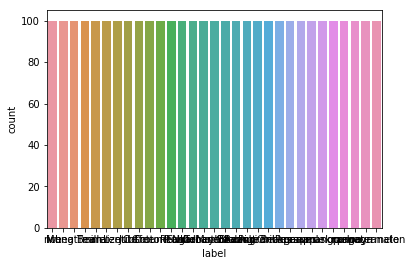

In [17]:
sns.countplot(data['label'])

In [18]:
data['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [7]:
dict_soil_type={'rice':'clay', 'wheat':'loamy', 'Mung Bean':'loamy', 'Tea':'sandy', 'millet':'alluvial', 'maize':'loamy', 'Lentil':'loamy',
       'Jute':'alluvial', 'Coffee':'volcanic', 'Cotton':'loamy', 'Ground Nut':'loamy', 'Peas':'loamy', 'Rubber':'loamy',
       'Sugarcane':'clay', 'Tobacco':'alluvial', 'Kidney Beans':'clay', 'Moth Beans':'sandy', 'Coconut':'sandy',
       'Black gram':'loamy', 'Adzuki Beans':'sandy', 'Pigeon Peas':'loamy', 'Chickpea':'loamy', 'banana':'loamy',
       'grapes':'sandy', 'apple':'loamy', 'mango':'alluvial', 'muskmelon':'sandy', 'orange':'loamy', 'papaya':'alluvial',
       'pomegranate':'alluvial', 'watermelon':'sandy'}

In [22]:
data['soil_type']=[dict_soil_type[i] for i in data['label']]

In [23]:
data.head()

,temperature,humidity,ph,rainfall,label,soil_type
0,20.879744,82.002744,6.502985,202.935536,rice,clay
1,21.770462,80.319644,7.038096,226.655537,rice,clay
2,23.004459,82.320763,7.840207,263.964248,rice,clay
3,26.491096,80.158363,6.980401,242.864034,rice,clay
4,20.130175,81.604873,7.628473,262.717340,rice,clay


In [24]:
data.to_csv('crop recomend 1 .csv')

In [25]:
data1=data.drop('label',axis=1)

In [26]:
data2=pd.get_dummies(data1)

In [27]:
data3=data1.drop('soil_type',axis=1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
X_train,X_test,y_train,y_test=train_test_split(data3,data['label'])

In [14]:
len(X_train)

2325

In [15]:
len(y_train)

2325

In [30]:
gd_KNN=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,3,5,7]},cv=5).fit(X_train,y_train)

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
gd_KNN.best_params_

{'n_neighbors': 3}

In [32]:
gd_KNN.best_score_

0.8309677419354838

In [33]:
gd_KNN.best_estimator_.score(X_test,y_test)

0.824516129032258

In [34]:
gd_RF=GridSearchCV(RandomForestClassifier(),{'n_estimators':[50,100,150],'max_depth':[17,20,22,25]},cv=5).fit(X_train,y_train)

C:\Users\ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
gd_RF.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [36]:
gd_RF.best_score_

0.946236559139785

In [37]:
gd_RF.score(X_test,y_test)

0.9367741935483871

In [38]:
pickle.dump(gd_RF,open('model1 crop_recomendation.pkl','wb'))